# Module Efficiency History and Projections

In [3]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt

cwd = os.getcwd() #grabs current working directory
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

This journal covers the development of a historical baseline and baseline future projection of average module efficiency for each installation year.

In [67]:
skipcols = ['Source']
mod_eff_raw = pd.read_csv(os.path.join(supportMatfolder,"module_eff.csv"), 
                          index_col='Year', usecols=lambda x: x not in skipcols)
mod_eff_raw['mod_eff'] = pd.to_numeric(mod_eff_raw['mod_eff'])

19.2


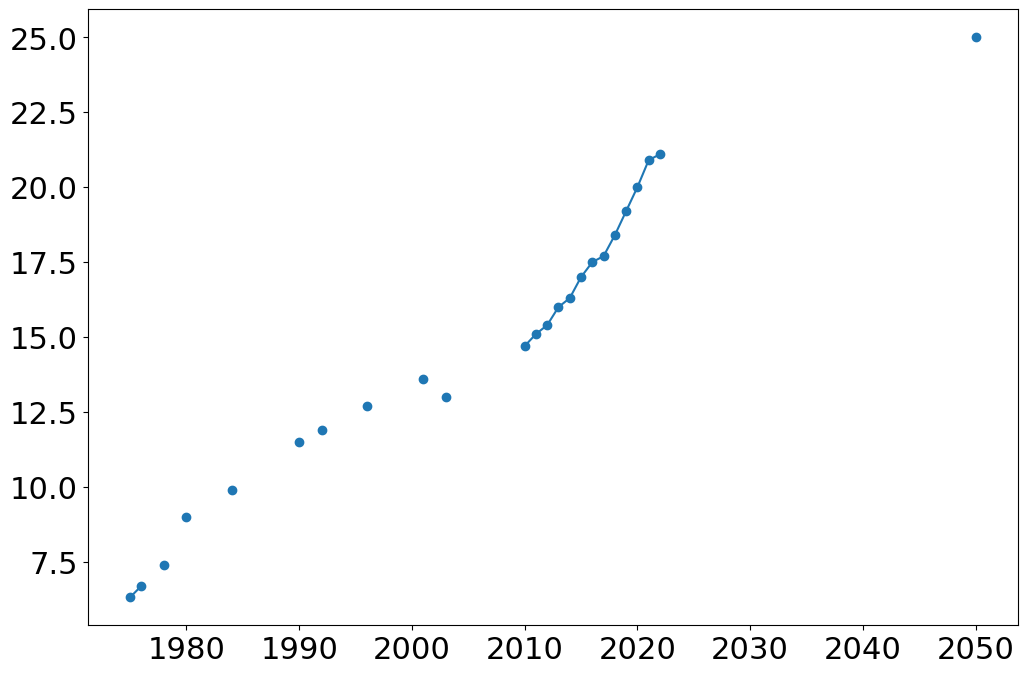

In [68]:
print(mod_eff_raw['mod_eff'][2019])
plt.plot(mod_eff_raw, marker='o')

There appears to be an "outlier" in 2003. This is from a different source. It does however, fit within the range of module efficiency specified in the prior data point (2001, avg = 13.6, min = 12, max = 16.1). For the purposes of interpolation, we will drop this single datapoint.

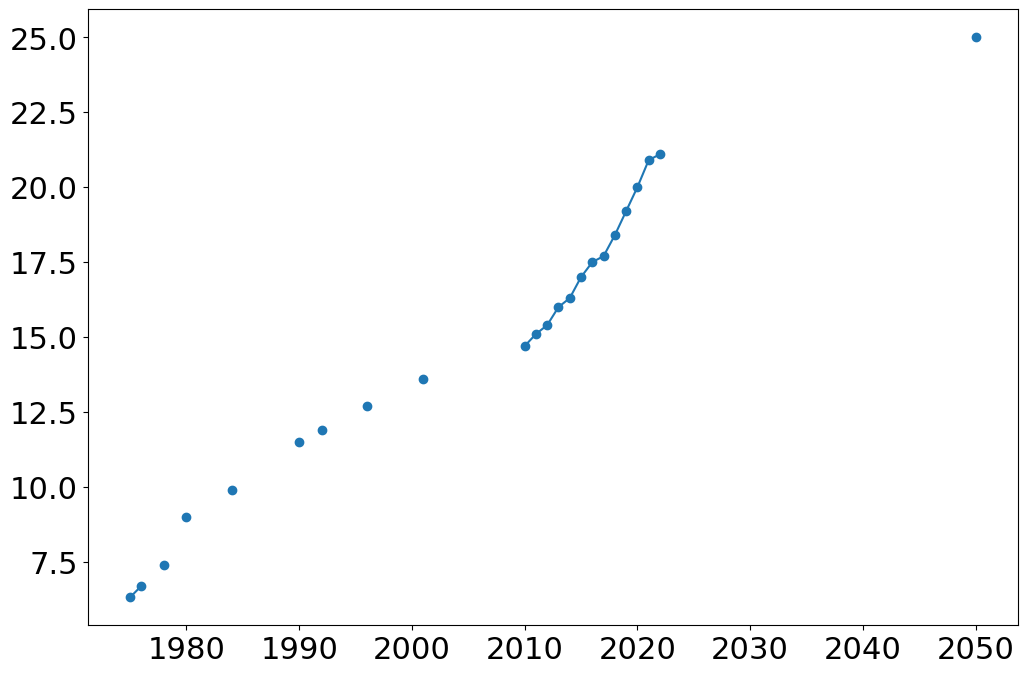

In [69]:
mod_eff_raw['mod_eff'][2003]=np.nan
plt.plot(mod_eff_raw, marker='o')

Now interpolate for missing years. Going to break into 2 parts for this, a linear historical part, and an exponential decay out to 2050.

In [70]:
df_findrecentyear = mod_eff_raw.loc[(mod_eff_raw.index<=2049)] #remove goal point
recentyear = df_findrecentyear.last_valid_index() #find most recent year of efficiency data
print('The most recent efficiency data is from ',recentyear)

The most recent efficiency data is from  2022


In [71]:
mod_eff_early = mod_eff_raw.loc[(mod_eff_raw.index<=recentyear)]
mod_eff_history = mod_eff_early.interpolate(method='linear',axis=0)

(0.0, 30.0)

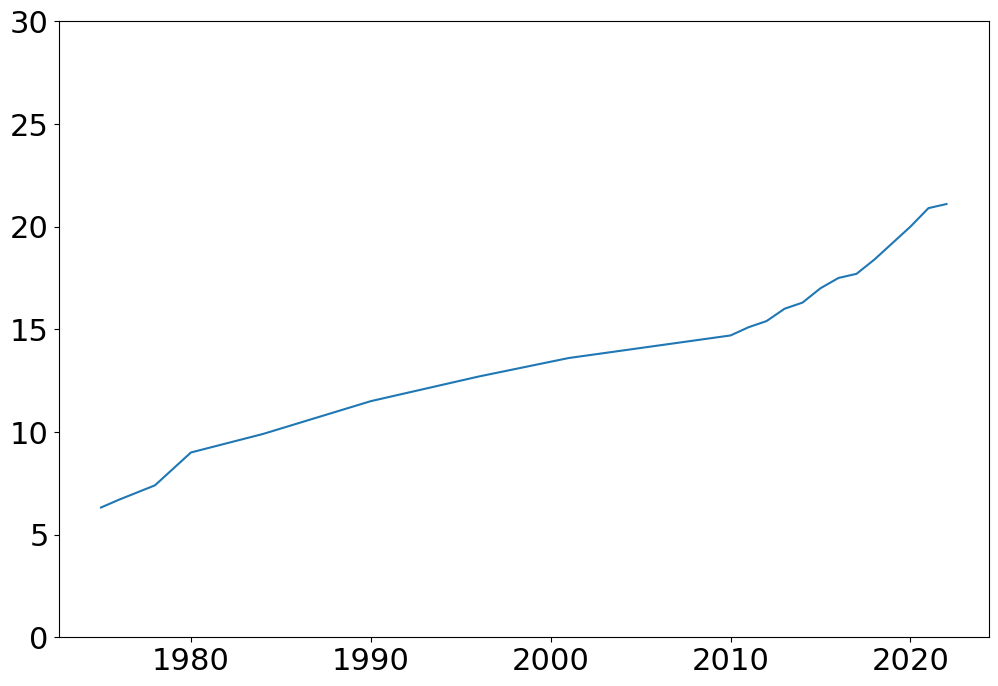

In [72]:
#print(mod_eff_history)
plt.plot(mod_eff_history)
plt.ylim(0,30)

In [73]:
# Import curve fitting package from scipy
from scipy.optimize import curve_fit
# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)


25.061726892133365


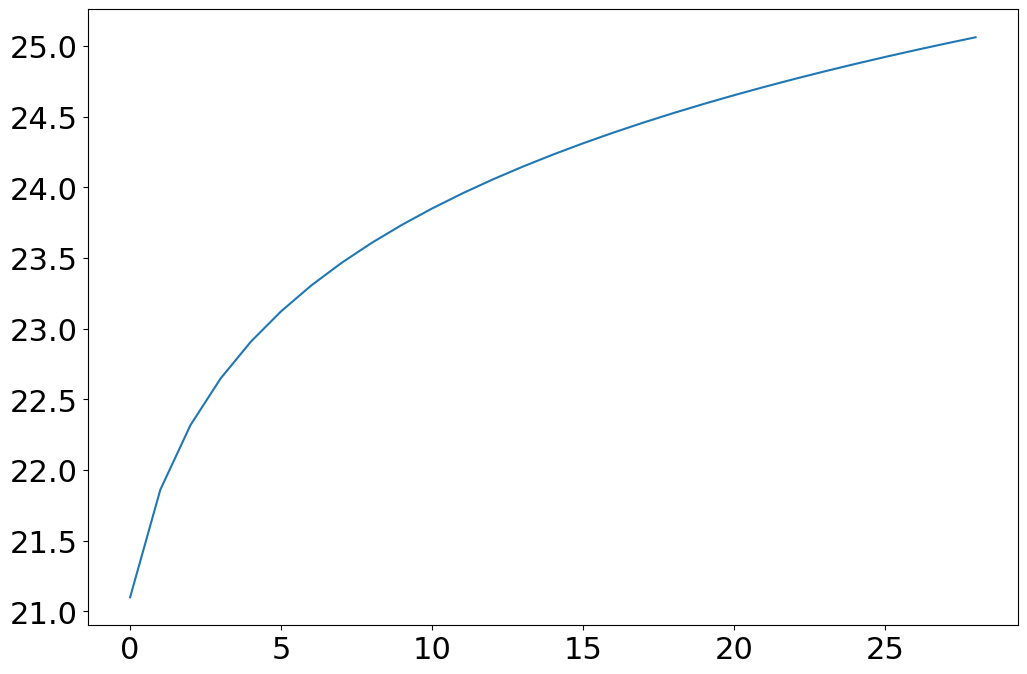

In [76]:
#generae a dataset for the area in between
mod_eff_late = mod_eff_raw.loc[(mod_eff_raw.index>=recentyear)]
y_dummy = power_law(mod_eff_late.index-(recentyear-1), mod_eff_late['mod_eff'][recentyear], 0.0511) #17.9
#played around with the exponential until y_dummy[31] closely matched projected 25.06% value. CITE
print(y_dummy[-1])
plt.plot(y_dummy)

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_21608\988262430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_eff_late['mod_eff'] = y_dummy


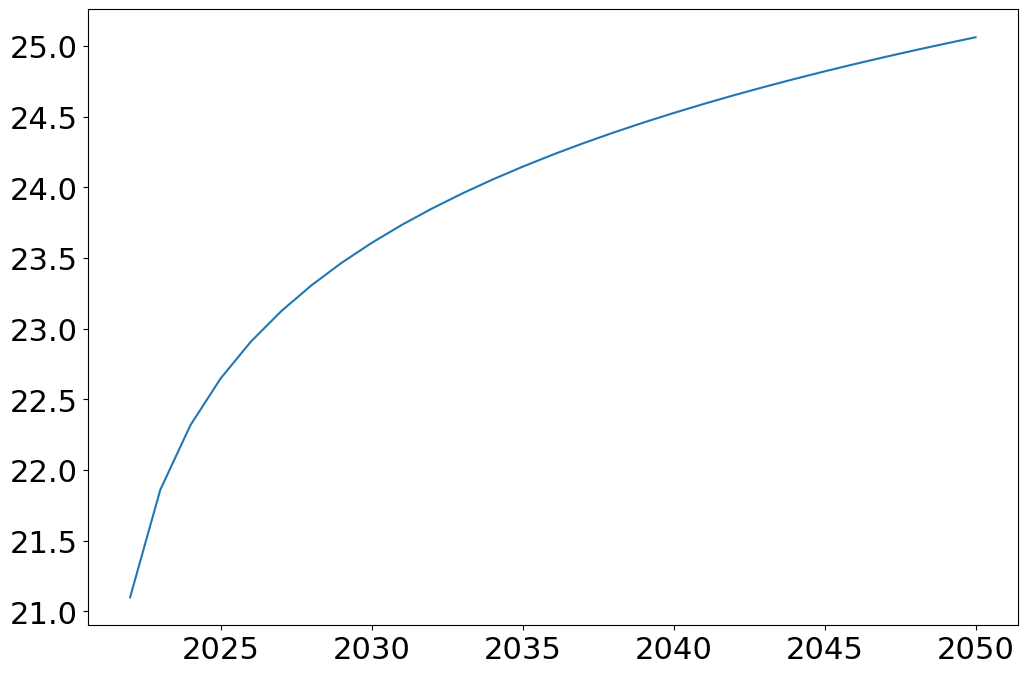

In [77]:
#create a dataframe of the projection
mod_eff_late['mod_eff'] = y_dummy
#print(mod_eff_late)
plt.plot(mod_eff_late)
#mod_eff_late.to_csv(cwd+'/../../../PV_ICE/baselines/SupportingMaterial/output_module_eff_perovskite.csv', index=True)

Now smash the two dataframes back together for our average module efficiency baseline.

In [78]:
mod_eff = pd.concat([mod_eff_history, mod_eff_late.loc[mod_eff_late.index>recentyear]])
mod_eff.to_csv(os.path.join(supportMatfolder, 'output_avg_module_eff_final.csv'), index=True)

Text(0, 0.5, 'Efficiency (%)')

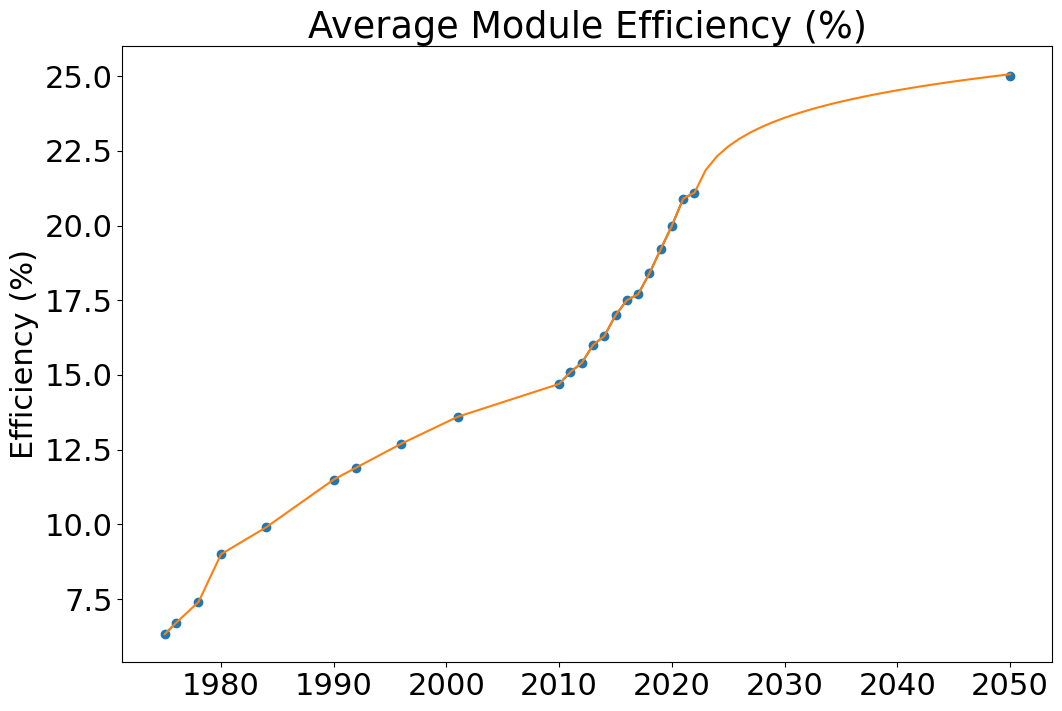

In [59]:
plt.plot(mod_eff_raw, marker='o')
plt.plot(mod_eff)
plt.title('Average Module Efficiency (%)')
plt.ylabel('Efficiency (%)')

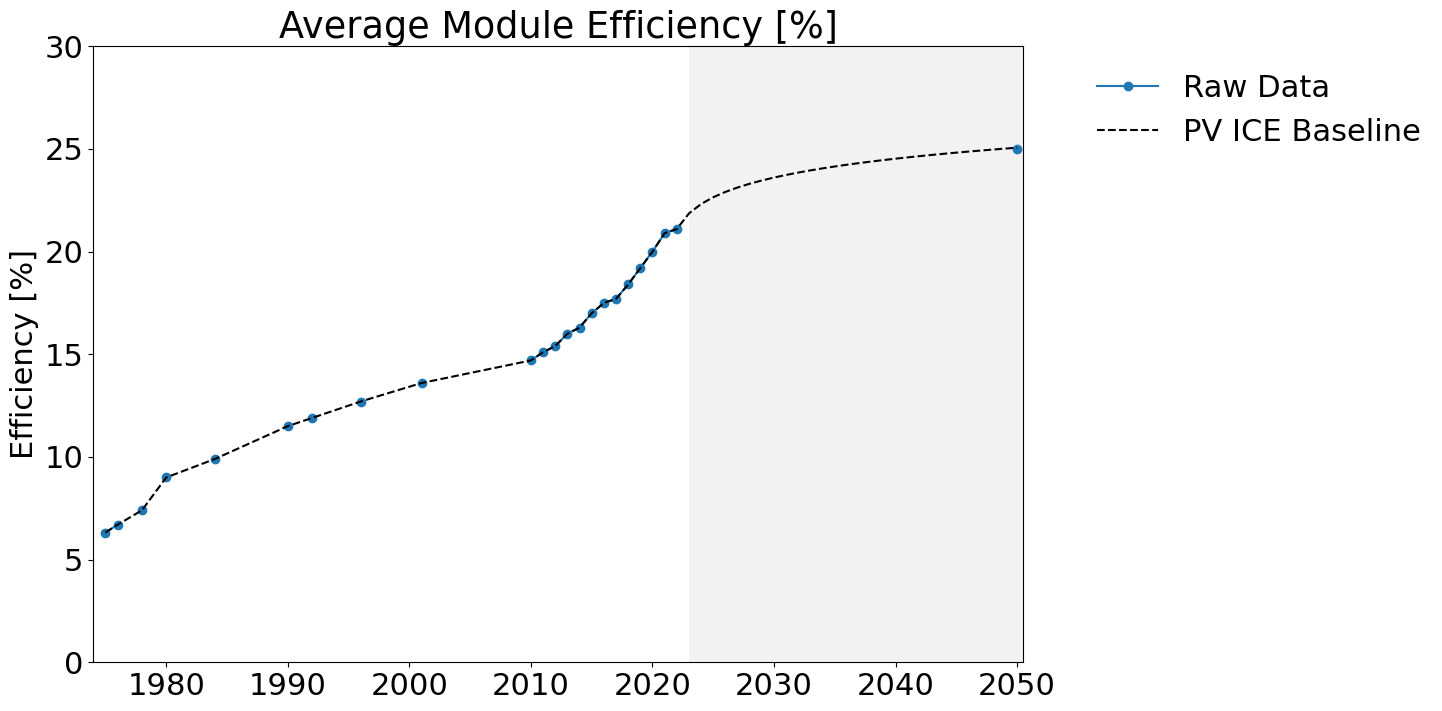

In [66]:
#graph for paper
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

plt.axvspan(recentyear+1, 2050.5, facecolor='gray', alpha=0.1)
plt.plot(mod_eff_raw, marker='o', label='Raw Data')
plt.plot(mod_eff, '--k', label='PV ICE Baseline')
plt.title('Average Module Efficiency [%]')
plt.ylabel('Efficiency [%]')
plt.legend()
plt.xlim([1974, 2050.5])
plt.ylim(0.0, 30)
plt.legend(frameon=False, bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Bifaciality Factor

With the advent of bifacial cells and modules with transparent backsheets/glass, there is a bonus energy produced from the slightly less efficient backside cell. This section of the journal records the increasing bifaciality factor, which is how this extra generation is currently tracked (2021).

Current procedure is to update the historical and projected factors in the baseline file, then run it through here to interpolate, and replace the file.

In [11]:
cwd = os.getcwd() #grabs current working directory
bifi_raw = pd.read_csv(cwd+"/../../../PV_ICE/baselines/baseline_bifaciality_factor.csv", 
                          index_col='Year')

(0.0, 1.0)

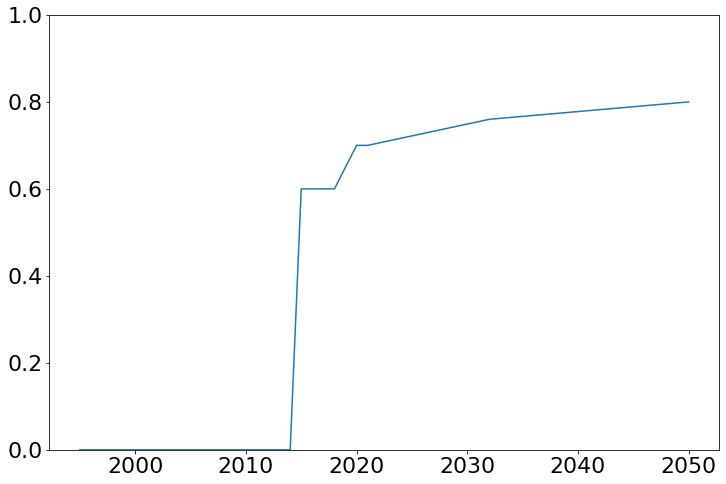

In [12]:
bifi = bifi_raw.interpolate()
plt.plot(bifi)
plt.ylim(0,1.0)

In [13]:
bifi.to_csv(cwd+'/../../../PV_ICE/baselines/baseline_bifaciality_factor.csv', index=True)